In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import requests
from io import StringIO
from bs4 import BeautifulSoup
import time
import gc
import geopy
from geopy.geocoders import Nominatim
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [10]:
df = pd.read_csv("climate_by_state_more_vars.csv", index_col = ('STATE', 'month'))
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)
pca = PCA()
pca.fit(scaled_data)

x_pca = pca.transform(scaled_data)

In [13]:
type(x_pca)

numpy.ndarray

In [19]:
pca_df = pd.DataFrame(x_pca, columns=[f'PC{i+1}' for i in range(x_pca.shape[1])])

In [20]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
0,-2.052185,-3.102598,0.292278,1.162538,-1.120028,0.219982,-0.218663,-0.186292,-0.227537,-0.332027,...,-0.080717,0.288640,-0.015770,-0.003968,-0.019078,0.015133,0.009183,0.009588,-0.000009,0.000012
1,-1.327845,-2.675207,0.228367,0.571496,-1.130634,0.255549,-0.317240,-0.060552,-0.337881,-0.380338,...,-0.026496,0.271745,-0.047518,0.013725,-0.017357,0.024950,0.019976,-0.006411,-0.000034,0.000034
2,0.025576,-2.247717,0.369284,-0.015030,-0.890455,-0.146420,-0.309445,0.031562,-0.081940,-0.328344,...,0.023969,0.169406,-0.032159,-0.020001,0.046054,0.021567,0.008156,0.001028,-0.000033,0.000029
3,1.789926,-1.788846,0.459585,-0.287312,-0.192532,-0.154898,-0.285293,0.019459,0.023407,-0.250642,...,-0.013304,0.168058,-0.061080,-0.007186,0.059285,0.001298,0.003058,-0.002125,0.000054,-0.000080
4,3.773961,-2.214303,0.156725,-0.141763,0.399617,-0.362048,0.347922,-0.108922,0.090589,-0.249325,...,0.066147,0.012942,-0.020188,-0.022519,0.056521,-0.026466,0.001653,0.001747,0.000055,-0.000018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1.689166,1.194249,3.099080,0.040080,0.021106,-0.330938,-0.205403,0.140155,-0.269189,-0.407896,...,-0.073603,-0.169684,-0.055491,-0.037910,0.018739,0.015355,0.020966,-0.001189,0.000033,-0.000002
596,-0.213486,1.131900,2.716595,0.049067,0.227702,-0.286372,-0.626658,-0.042226,-0.095525,-0.157126,...,-0.124341,-0.114449,0.052375,-0.014200,0.037735,0.039386,0.015137,-0.008949,0.000015,0.000051
597,-2.612396,1.372650,2.208561,0.742297,0.317543,-0.169643,-0.562508,-0.249824,0.077167,0.099635,...,-0.084514,-0.213026,0.132178,-0.065976,0.011610,0.027237,0.004495,-0.002383,-0.000024,0.000015
598,-4.556711,1.850449,1.840574,1.794356,0.699977,-0.319936,-0.316016,-0.608728,0.140514,0.307925,...,-0.046262,-0.117576,0.112380,0.022488,0.015759,-0.007237,-0.017526,0.005754,-0.000064,0.000047


In [22]:
pca.explained_variance_ratio_

array([5.45171842e-01, 1.60747651e-01, 1.09777705e-01, 6.34550265e-02,
       5.31600703e-02, 1.81487600e-02, 1.27874081e-02, 1.16524260e-02,
       6.56499838e-03, 5.20538072e-03, 4.28816826e-03, 3.19588577e-03,
       2.21748305e-03, 2.01632203e-03, 1.21581819e-03, 2.43824214e-04,
       7.12163979e-05, 4.66021633e-05, 1.88863384e-05, 1.01494849e-05,
       4.37551123e-06, 2.07557313e-10, 1.79197432e-10])

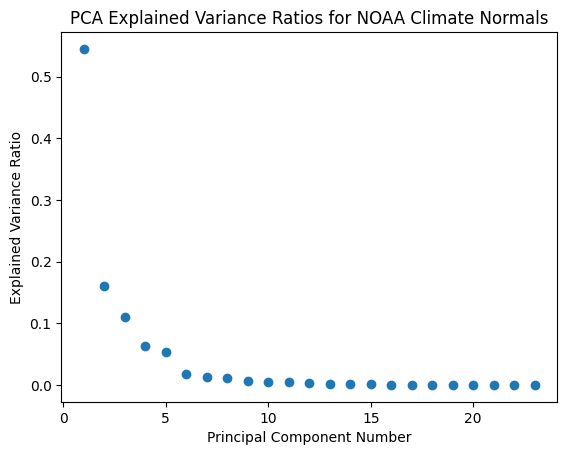

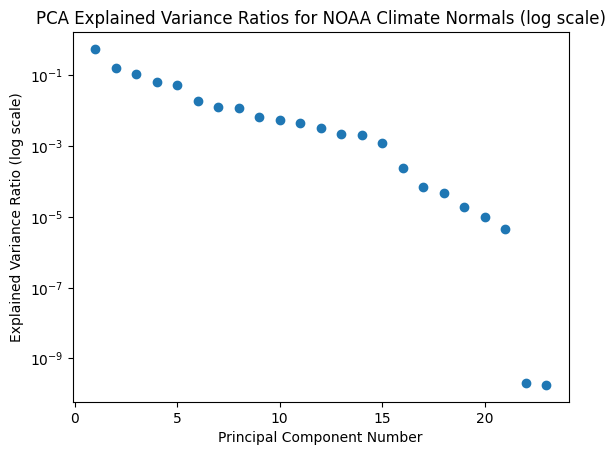

In [27]:
plt.scatter(range(1,df.shape[1] + 1), pca.explained_variance_ratio_)
plt.xlabel("Principal Component Number")
plt.ylabel("Explained Variance Ratio")
plt.title("PCA Explained Variance Ratios for NOAA Climate Normals")
plt.show()

plt.scatter(range(1,df.shape[1] + 1), pca.explained_variance_ratio_)
plt.xlabel("Principal Component Number")
plt.ylabel("Explained Variance Ratio (log scale)")
plt.yscale("log")
plt.title("PCA Explained Variance Ratios for NOAA Climate Normals (log scale)")
plt.show()

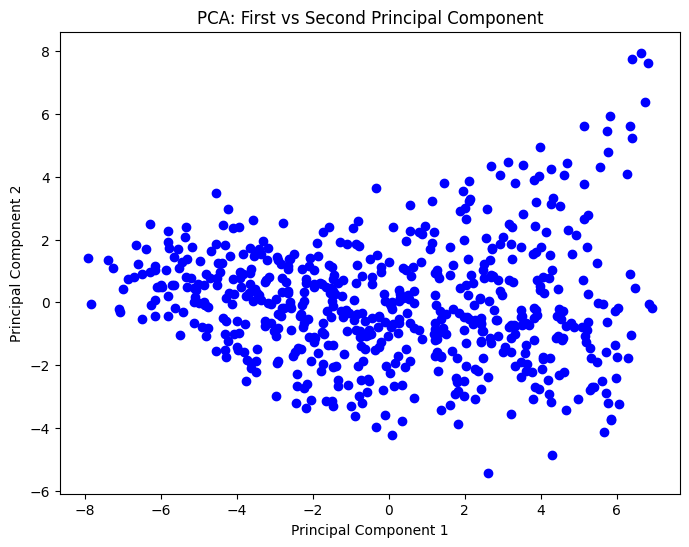

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='blue')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First vs Second Principal Component')
plt.show()

In [32]:
for column in pca_df:
    df[column] = pca_df[column]

In [37]:
df_with_pc = df.reset_index()
for column in pca_df:
    df_with_pc[column] = pca_df[column]

In [38]:
df_with_pc

,STATE,month,HLY-TEMP-NORMAL,HLY-TEMP-10PCTL,HLY-TEMP-90PCTL,HLY-DEWP-NORMAL,HLY-DEWP-10PCTL,HLY-DEWP-90PCTL,HLY-PRES-NORMAL,HLY-PRES-10PCTL,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
0,Alabama,1,45.896304,31.040575,61.456250,35.785534,16.403545,55.925202,1021.493378,1012.674137,...,-0.080717,0.288640,-0.015770,-0.003968,-0.019078,0.015133,0.009183,0.009588,-0.000009,0.000012
1,Alabama,2,49.679501,35.924275,63.863039,38.478237,20.950856,57.460361,1020.109946,1012.019316,...,-0.026496,0.271745,-0.047518,0.013725,-0.017357,0.024950,0.019976,-0.006411,-0.000034,0.000034
2,Alabama,3,56.742473,43.463508,69.175941,43.799345,26.681452,60.043532,1018.526386,1010.551708,...,0.023969,0.169406,-0.032159,-0.020001,0.046054,0.021567,0.008156,0.001028,-0.000033,0.000029
3,Alabama,4,64.101997,53.041510,73.818125,51.627760,37.186302,64.222934,1016.634294,1009.963562,...,-0.013304,0.168058,-0.061080,-0.007186,0.059285,0.001298,0.003058,-0.002125,0.000054,-0.000080
4,Alabama,5,71.805225,62.842876,79.097900,60.433737,48.984140,68.871001,1016.114920,1010.849829,...,0.066147,0.012942,-0.020188,-0.022519,0.056521,-0.026466,0.001653,0.001747,0.000055,-0.000018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,Wyoming,8,67.179385,57.783216,75.414432,41.067193,30.525726,50.866208,1014.070125,1008.560137,...,-0.073603,-0.169684,-0.055491,-0.037910,0.018739,0.015355,0.020966,-0.001189,0.000033,-0.000002
596,Wyoming,9,57.212760,44.841545,68.081458,34.458041,23.457078,45.281219,1014.784021,1007.040635,...,-0.124341,-0.114449,0.052375,-0.014200,0.037735,0.039386,0.015137,-0.008949,0.000015,0.000051
597,Wyoming,10,44.132124,30.168196,56.792658,26.493940,15.882023,36.357002,1016.453489,1006.576056,...,-0.084514,-0.213026,0.132178,-0.065976,0.011610,0.027237,0.004495,-0.002383,-0.000024,0.000015
598,Wyoming,11,32.076701,17.010747,46.239306,18.308679,6.479983,28.827944,1018.217827,1006.612465,...,-0.046262,-0.117576,0.112380,0.022488,0.015759,-0.007237,-0.017526,0.005754,-0.000064,0.000047
